In [1]:
 %matplotlib inline

from pathlib import Path
import math 
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plasmapy.analysis import swept_langmuir as sla

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

np.set_printoptions(precision=4, threshold=16)

from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'plasmapy'

In [17]:
#numpy array from csv file

data1 = np.genfromtxt('1275vrun1.csv', delimiter=',')
data2 = np.genfromtxt('1275vrun2.csv',delimiter=',' )
data3 = np.genfromtxt('1275vrun3.csv',delimiter=',' )
data4 = np.genfromtxt('1275vrun4.csv',delimiter=',' )
data5 = np.genfromtxt('1275vrun5.csv',delimiter=',' )
xdata = data1[:, 0]
ydata1 = data1[:, 1]
ydata2 = data2[:, 1]
ydata3 = data3[:, 1]
ydata4 = data4[:, 1]
ydata5 = data5[:, 1]
ydata = (ydata1+ydata2+ydata3+ydata4+ydata5)/5
print(ydata1.size, ydata.size)
print(ydata1[100], ydata[100])


161 161
0.0001256329 0.0001321367


In [18]:
#save data as numpy array
#np.save('1275v_avg.npy', 'arr')

# PlasmaPy Floating Potential

In [19]:
# load data
np.load = "1275v_avg.npy"
voltage = xdata
current = ydata

# voltage array needs to be monotonically increasing/decreasing
isort = np.argsort(voltage)
voltage = voltage[isort]
current = current[isort]

# get default fit results (exponential fit)
results = sla.find_floating_potential(voltage, current, min_points=10)

# get linear fit results
results_lin = sla.find_floating_potential(voltage, current, fit_type="linear")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


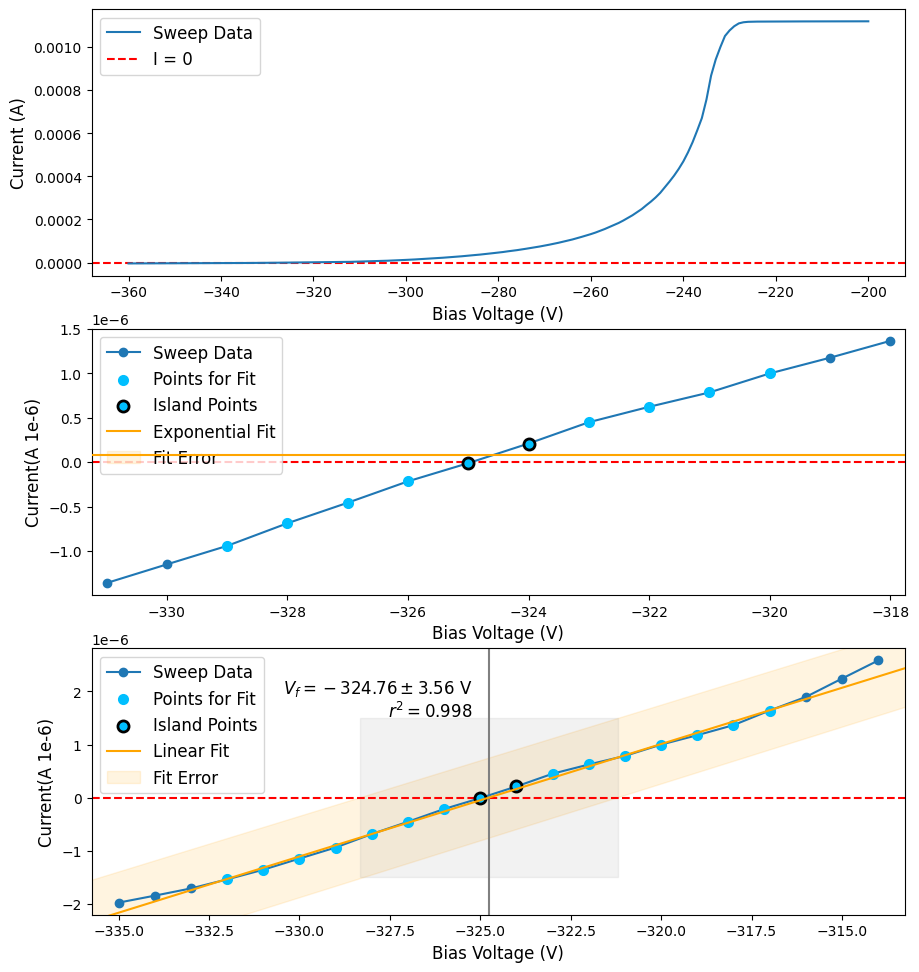

In [20]:
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 2.0 * figheight
fig, axs = plt.subplots(3, 1, figsize=[figwidth, figheight])

# plot original data
axs[0].set_xlabel("Bias Voltage (V)", fontsize=12)
axs[0].set_ylabel("Current (A)", fontsize=12)

axs[0].plot(voltage, current, zorder=10, label="Sweep Data")
axs[0].axhline(0.0, color="r", linestyle="--", label="I = 0")
##axs[0].axvline(vf, color="grey", label="Floating Potential")
##axs[0].axvline(-230, color="grey", label="-230")
axs[0].legend(fontsize=12)

# zoom on fit
for ii, label, rtn in zip([1, 2], ["Exponential", "Linear"], [results, results_lin]):
    vf = rtn[0]
    extras = rtn[1]

    # calc island points
    isl_pts = np.array([], dtype=np.int64)
    for isl in extras.islands:
        isl_pts = np.concatenate((isl_pts, np.r_[isl]))

    # calc xrange for plot
    xlim = [voltage[extras.fitted_indices].min(), voltage[extras.fitted_indices].max()]
    vpad = 0.25 * (xlim[1] - xlim[0])
    xlim = [xlim[0] - vpad, xlim[1] + vpad]

    # calc data points for fit curve
    mask1 = np.where(voltage >= xlim[0], True, False)
    mask2 = np.where(voltage <= xlim[1], True, False)
    mask = np.logical_and(mask1, mask2)
    vfit = np.linspace(xlim[0], xlim[1], 201, endpoint=True)
    ifit, ifit_err = extras.fitted_func(vfit, reterr=True)

    axs[ii].set_xlabel("Bias Voltage (V)", fontsize=12)
    axs[ii].set_ylabel("Current(A 1e-6)", fontsize=12)
    axs[ii].set_xlim(xlim)

    axs[ii].plot(
        voltage[mask],
        current[mask],
        marker="o",
        zorder=10,
        label="Sweep Data",
    )
    axs[ii].scatter(
        voltage[extras.fitted_indices],
        current[extras.fitted_indices],
        linewidth=2,
        s=6**2,
        facecolors="deepskyblue",
        edgecolors="deepskyblue",
        zorder=11,
        label="Points for Fit",
    )
    axs[ii].scatter(
        voltage[isl_pts],
        current[isl_pts],
        linewidth=2,
        s=8**2,
        facecolors="deepskyblue",
        edgecolors="black",
        zorder=12,
        label="Island Points",
    )
    axs[ii].autoscale(False)
    axs[ii].plot(vfit, ifit, color="orange", zorder=13, label=label + " Fit")
    axs[ii].fill_between(
        vfit,
        ifit + ifit_err,
        ifit - ifit_err,
        color="orange",
        alpha=0.12,
        zorder=0,
        label="Fit Error",
    )
    axs[ii].axhline(0.0, color="r", linestyle="--")
    axs[ii].fill_between(
        [vf - extras.vf_err, vf + extras.vf_err],
        axs[1].get_ylim()[0],
        axs[1].get_ylim()[1],
        color="grey",
        alpha=0.1,
    )
    axs[ii].axvline(vf, color="grey")
    axs[ii].legend(fontsize=12)

    # add text
    rsq = extras.rsq
    txt = f"$V_f = {vf:.2f} \\pm {extras.vf_err:.2f}$ V\n"
    txt += f"$r^2 = {rsq:.3f}$"
    txt_loc = [vf, axs[ii].get_ylim()[1]]
    txt_loc = axs[ii].transData.transform(txt_loc)
    txt_loc = axs[ii].transAxes.inverted().transform(txt_loc)
    txt_loc[0] -= 0.02
    txt_loc[1] -= 0.26
    axs[ii].text(
        txt_loc[0],
        txt_loc[1],
        txt,
        fontsize="large",
        transform=axs[ii].transAxes,
        ha="right",
    )

# Semi-log plot for electron current

In [21]:
from scipy.optimize import curve_fit

/var/folders/rf/1drd2w1x03s8tcx7jfc3yj_80000gn/T/ipykernel_849/1137156571.py:1: RuntimeWarning: divide by zero encountered in log
  logydata=np.log(ydata+np.abs(ydata[0]))


-inf
[0.0564 5.841 ]


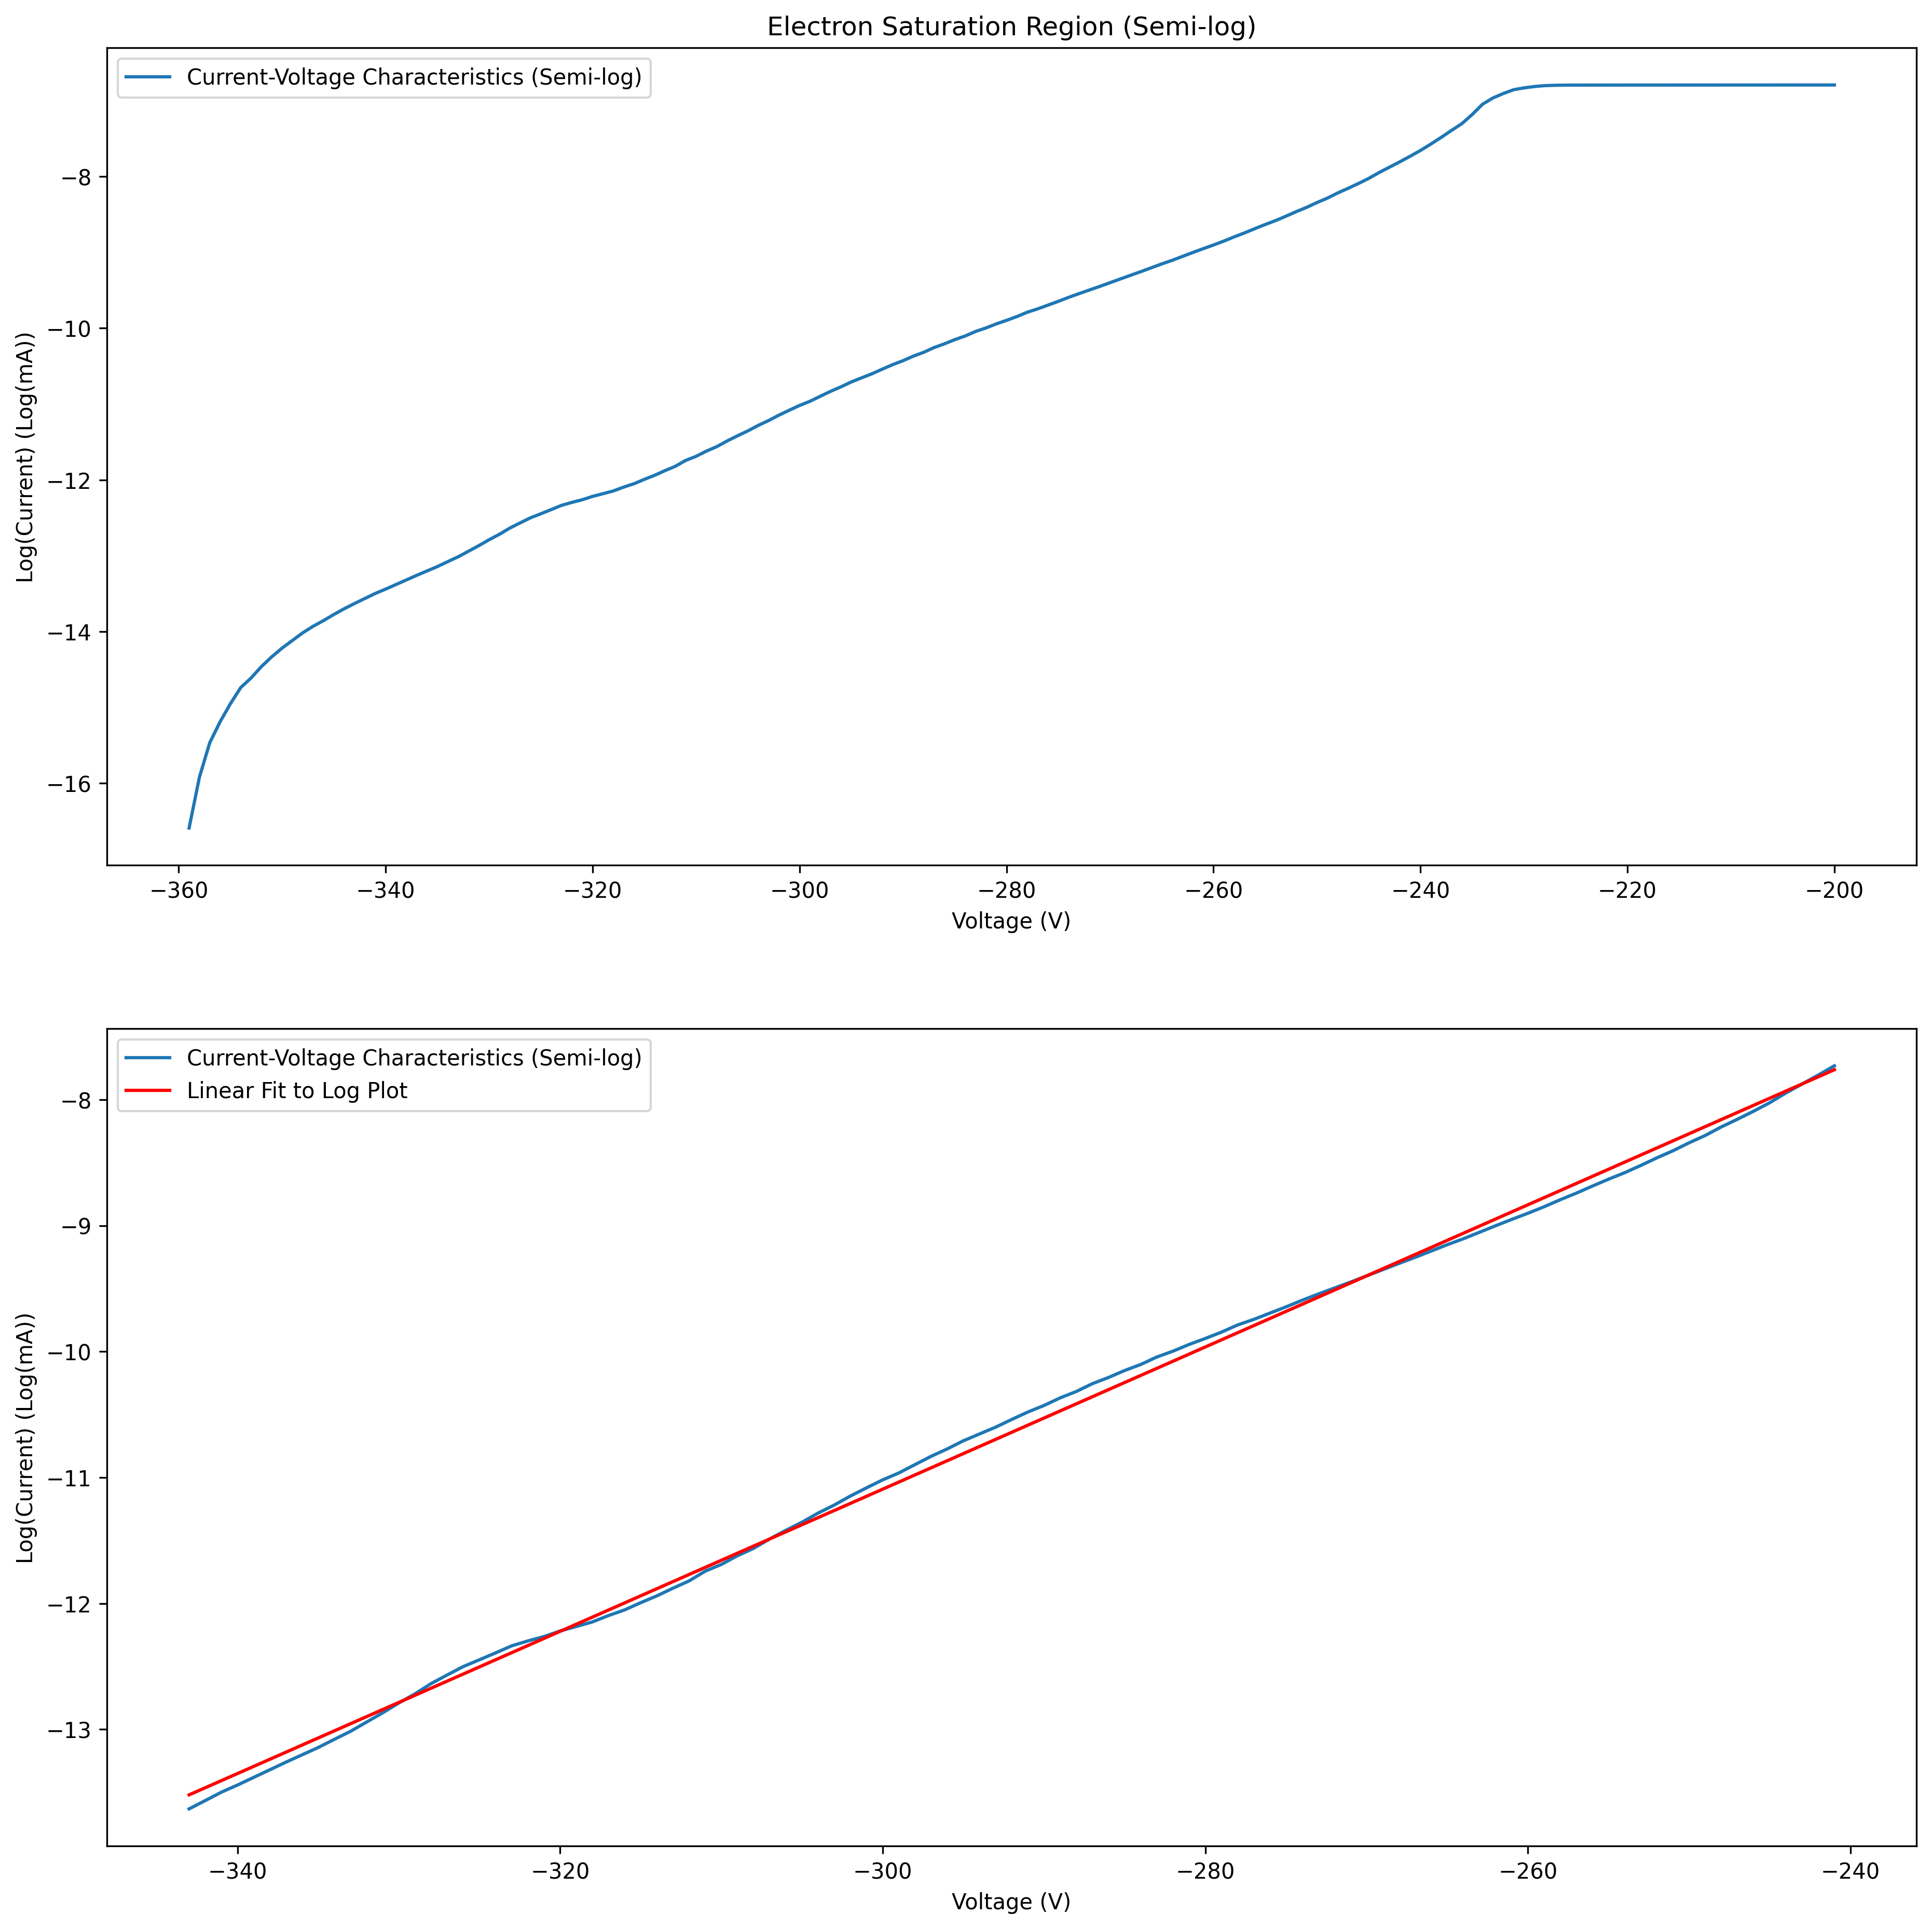

In [56]:

logydata=np.log(ydata+np.abs(ydata[0]))
print(logydata[0])


def func(x,a,b): return a*x+b

popt, pcov = curve_fit(func, xdata[17:120], logydata[17:120], p0=[1.0,1.0]) ##p0=initial guess for a,b

print(popt)

x_model = xdata[17:120]
y_model = func(x_model, popt[0], popt[1])

fig = plt.figure(figsize=(15,15), dpi=300)
ax0 = fig.add_subplot(2,1,1, xlabel='Voltage (V)', ylabel='Log(Current) (Log(mA))')
ax0.plot(xdata, logydata, label='Current-Voltage Characteristics (Semi-log)')
plt.title('Electron Saturation Region (Semi-log)')
plt.legend()

ax1 = fig.add_subplot(2,1,2, xlabel='Voltage (V)', ylabel='Log(Current) (Log(mA))')
ax1.plot(xdata[17:120], logydata[17:120], label='Current-Voltage Characteristics (Semi-log)')
ax1.plot(x_model,y_model, color='r', label= 'Linear Fit to Log Plot')
plt.legend()
plt.errorbar (xdata,logydata,yerr=

plt.show()

In [31]:
print(ydata[0])

-3.9376156e-06


# Electron Temp from Lab Ideas

In [23]:
import math
import scipy.optimize as opt

In [59]:
k = 1.380649E-23
e = 1.602176634E-19
i = popt[0]**-1
print(i)
print(i*(e/k))

17.715891879482832
205584.38835488047


In [61]:
p = .525 #tube pressure in torr
R = 2.54 #tube radius in cm
#
# For choices of gas constants see a table in the jupyter document
# in which this embedded or else see p. 59 Table 4.3 and p. 197 of
# Y. P. Raizer, "Gas Discharge Physics (Springer Verlag, 1991)
#
# The following gas constants are for nitrogen
Vi = 15.5 #ionization potential in volts
c = 0.04 #von Engel-Steenbeck consant (volts)^0.25(cm/s)^-0.5(torr-cm)^-1
#
# The following gas constants are for neon
###Vi = 21.5 #ionization potential in volts
###c = 0.006 #von Engel-Steenbeck consant (volts)^0.25(cm/s)^-0.5(torr-cm)^-1
#
cpRterm = 16.27+2*math.log(c*p*R)
#etempRatioGuess = Vi/etempGuess
etempRatioGuess = cpRterm
print('{0:.3f} eV {1:.0f} K - first guess of electron temperature'.format(Vi/etempRatioGuess,11605*Vi/etempRatioGuess)) 
#
# Here is the von Engel - Steenbeck transcendental function
def etempfunc(etempRatio,cpRterm):
#    fvalue = math.exp(etempRatio)-numfac*math.sqrt(etempRatio)
    fvalue = etempRatio-0.5*math.log(etempRatio)-cpRterm
#    print(fvalue)
    return fvalue
#
# Find and print the zero of the above function
# See: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html
etempRatio=opt.fsolve(etempfunc,etempRatioGuess,args=(cpRterm))
etemp=Vi/etempRatio
print('{0:.3f} eV {1:.0f} K - refined estimate of electron temperature'.format(etemp[0],11605*etemp[0])) 
#
#The following legacy code tested the root solver fsolve
#def quad(x):
#    return x*x-2*x+1
#print(opt.fsolve(quad,0.7))

1.489 eV 17283 K - first guess of electron temperature
1.332 eV 15460 K - refined estimate of electron temperature


/var/folders/rf/1drd2w1x03s8tcx7jfc3yj_80000gn/T/ipykernel_849/2899055502.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fvalue = etempRatio-0.5*math.log(etempRatio)-cpRterm


# Plasma Potential Using dI/dV

<function matplotlib.pyplot.show(close=None, block=None)>

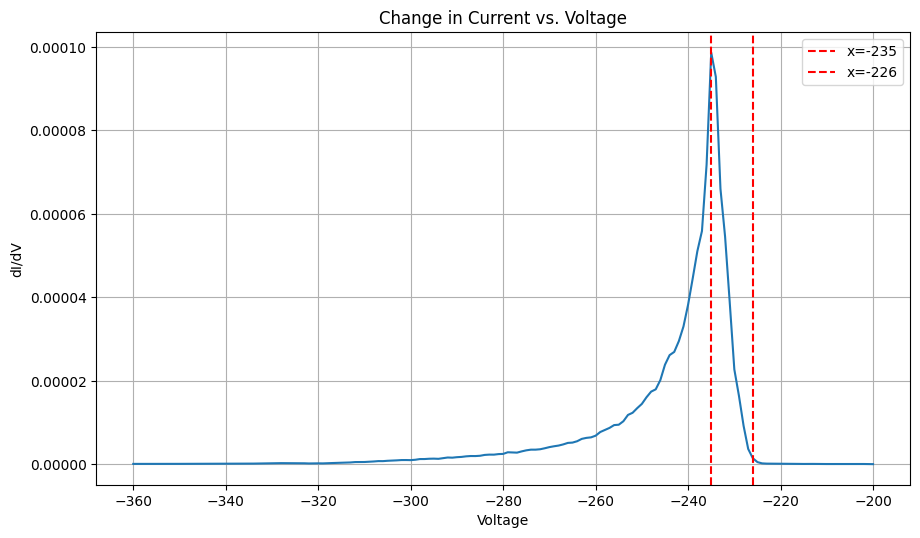

In [25]:
#take and plot derivative to find maxima
dydx = np.gradient(ydata, xdata)
plt. plot (xdata, dydx)
plt.xlabel('Voltage')
plt.ylabel('dI/dV')
plt.title('Change in Current vs. Voltage')
plt.grid(True)
plt.axvline(x=-235, color='r', linestyle='--', label='x=-235')
plt.axvline(x=-226, color='r', linestyle='--', label='x=-226')
plt.legend()

plt.show